>[Import Dependencies](#updateTitle=true&folderId=1OX6vJ8IpQZdy81bC8rcChpPaQNBxPuoy&scrollTo=XdbS8Er3pD_C)

>[Image Preprocessing: Encode as Array](#updateTitle=true&folderId=1OX6vJ8IpQZdy81bC8rcChpPaQNBxPuoy&scrollTo=qX7S1uginCT9)

>>[Train set](#updateTitle=true&folderId=1OX6vJ8IpQZdy81bC8rcChpPaQNBxPuoy&scrollTo=lGPxLqDhnJaa)

>>[Valid set](#updateTitle=true&folderId=1OX6vJ8IpQZdy81bC8rcChpPaQNBxPuoy&scrollTo=hRMxvUwhnOGO)

>>[Test set](#updateTitle=true&folderId=1OX6vJ8IpQZdy81bC8rcChpPaQNBxPuoy&scrollTo=fYzi0vzlnWu2)

>[Data Augmentation With Image Data Generator](#updateTitle=true&folderId=1OX6vJ8IpQZdy81bC8rcChpPaQNBxPuoy&scrollTo=s7K2IIoPn5J-)

>[Optimized EfficientNet CNN Model](#updateTitle=true&folderId=1OX6vJ8IpQZdy81bC8rcChpPaQNBxPuoy&scrollTo=B0Gw-VyHhiYn)

>>[Compile and Train the EfficientNet Model](#updateTitle=true&folderId=1OX6vJ8IpQZdy81bC8rcChpPaQNBxPuoy&scrollTo=jeFcet1mh8jq)

>[Evaluate EfficientNet Model](#updateTitle=true&folderId=1OX6vJ8IpQZdy81bC8rcChpPaQNBxPuoy&scrollTo=cOMH4HmKh8dL)

>[Confusion Matrix](#updateTitle=true&folderId=1OX6vJ8IpQZdy81bC8rcChpPaQNBxPuoy&scrollTo=WvdrlBaWiuPY)

>[Incorrectly Predicted Images](#updateTitle=true&folderId=1OX6vJ8IpQZdy81bC8rcChpPaQNBxPuoy&scrollTo=nO0ly5D7jC42)

>[Saliency Map](#updateTitle=true&folderId=1OX6vJ8IpQZdy81bC8rcChpPaQNBxPuoy&scrollTo=qm-AQ69UjIH9)

>[Conclusion](#updateTitle=true&folderId=1OX6vJ8IpQZdy81bC8rcChpPaQNBxPuoy&scrollTo=_S4WdXAGjU5l)

>[Next Steps](#updateTitle=true&folderId=1OX6vJ8IpQZdy81bC8rcChpPaQNBxPuoy&scrollTo=88P3O3-wjE2m)



# Import Dependencies

In [1]:
# making sure we have our dependencies
!pip install Pillow
!pip install rembg
# !pip uninstall tensorflow
!pip install tensorflow==2.13.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 95.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 87.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 49.9 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.10.0
    Uninstalling typing_extensions-4.10.0:
      Successfully uninstalled typing_extensions-4.10.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation:

In [1]:


# import python packages
import numpy as np
import pandas as pd

# import for plotting
import matplotlib.pyplot as plt

# import to display images
from IPython.display import Image, display

#import remove module
from rembg import remove

#import IMAGE module
from PIL import Image

# import math for setting plot grid size
import math

# import to get image array
import cv2

# import to navigate file system and copy images
import os
import shutil

# import tensorflow
import tensorflow as tf

# import keras
from tensorflow import keras


# import image data generator to preload images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# import specific neural network models & layer types
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

# import seaborn
import seaborn as sns

# import confusion matrix
from sklearn.metrics import confusion_matrix

#suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [3]:
! git clone https://github.com/LarissaHuang/capstone_project.git

Cloning into 'capstone_project'...
remote: Enumerating objects: 97739, done.
remote: Counting objects: 100% (6208/6208), done.
remote: Compressing objects: 100% (6169/6169), done.
remote: Total 97739 (delta 48), reused 6194 (delta 35), pack-reused 91531
Receiving objects: 100% (97739/97739), 2.32 GiB | 26.27 MiB/s, done.
Resolving deltas: 100% (66/66), done.
Updating files: 100% (111480/111480), done.


In [7]:
import shutil

# Define the source and destination paths
source_folder = '/content/capstone_project'
destination_folder = '/content/drive/My Drive/capstone_project'

# Copy the entire folder to Google Drive
shutil.copytree(source_folder, destination_folder)


'/content/drive/My Drive/capstone_project'

In [6]:
# Safety check to ensure the directory exists before attempting to delete it
if os.path.exists(destination_folder) and os.path.isdir(destination_folder):
    shutil.rmtree(destination_folder)
    print(f"The directory {destination_folder} has been removed along with all its contents.")
else:
    print("The directory does not exist.")

The directory /content/drive/My Drive/capstone_project has been removed along with all its contents.


TODO: Need to remount drive every working session

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# navigate to the repository directory
os.chdir('/content/drive/My Drive/capstone_project')

In [10]:
# verify by printing the current working directory
print("Current working directory:", os.getcwd())

Current working directory: /content/drive/My Drive/capstone_project


# Load in data

Loading in data from dataframes containing top 75 species by number of images. The code to generate these csv files is commented out as it's not needed but preserved for interpretability.

In [12]:
#Every time we start this notebook, we can load the dfs from here

df_train = pd.read_csv('Sprint_4/df_train_75.csv')
df_valid = pd.read_csv('Sprint_4/df_valid_75.csv')
df_test = pd.read_csv('Sprint_4/df_test_75.csv')


In [88]:
# # Count the occurrences of each unique value in the column
# df_grouped = df_train.groupby(['species']).count()

# # Sort 'df_grouped' DataFrame by the 'count' column in descending order
# sorted_df = df_grouped.sort_values(by='path', ascending=False)


# species_to_keep = sorted_df.head(75)

# species_array = species_to_keep.index.values
# species_array

array(['RUFOUS TREPE', 'HOUSE FINCH', 'D-ARNAUDS BARBET', 'OVENBIRD',
       'ASIAN GREEN BEE-EATER', 'SWINHOES PHEASANT', 'WOOD DUCK',
       'CASPIAN TERN', 'RED BILLED TROPICBIRD', 'WOOD THRUSH', 'MERLIN',
       'FRILL BACK PIGEON', 'PYRRHULOXIA', 'ORNATE HAWK EAGLE',
       'MILITARY MACAW', 'OYSTER CATCHER', 'LAUGHING GULL',
       'EASTERN YELLOW ROBIN', 'JACOBIN PIGEON', 'DARK EYED JUNCO',
       'GREATER PRAIRIE CHICKEN', 'RED TAILED HAWK',
       'YELLOW BREASTED CHAT', 'VIOLET BACKED STARLING',
       'VIOLET GREEN SWALLOW', 'SORA', 'PLUSH CRESTED JAY', 'LIMPKIN',
       'RED KNOT', 'GREY HEADED CHACHALACA', 'CRIMSON SUNBIRD',
       'BLUE THROATED PIPING GUAN', 'RED BEARDED BEE-EATER',
       'CAMPO FLICKER', 'CRESTED WOOD PARTRIDGE', 'KNOB BILLED DUCK',
       'SAYS PHOEBE', 'MARABOU STORK', 'ROSE BREASTED COCKATOO',
       'STRIATED CARACARA', 'NORTHERN PARULA', 'COPPERSMITH BARBET',
       'WILLOW PTARMIGAN', 'BLUE GRAY GNATCATCHER', 'WOODLAND KINGFISHER',
       'BANDED

In [89]:
# modifying our dataframes to include only our top 100 species by most images
# df_train = df_train[df_train['species'].isin(species_array)]
# df_valid = df_valid[df_valid['species'].isin(species_array)]
# df_test = df_test[df_test['species'].isin(species_array)]

In [96]:
# df_train

path                 species
1103   train/AFRICAN PIED HORNBILL/012.jpg   AFRICAN PIED HORNBILL
1104   train/AFRICAN PIED HORNBILL/036.jpg   AFRICAN PIED HORNBILL
1105   train/AFRICAN PIED HORNBILL/003.jpg   AFRICAN PIED HORNBILL
1106   train/AFRICAN PIED HORNBILL/006.jpg   AFRICAN PIED HORNBILL
1107   train/AFRICAN PIED HORNBILL/004.jpg   AFRICAN PIED HORNBILL
...                                    ...                     ...
84458  train/GREY HEADED CHACHALACA/94.jpg  GREY HEADED CHACHALACA
84459  train/GREY HEADED CHACHALACA/93.jpg  GREY HEADED CHACHALACA
84460  train/GREY HEADED CHACHALACA/92.jpg  GREY HEADED CHACHALACA
84461  train/GREY HEADED CHACHALACA/95.jpg  GREY HEADED CHACHALACA
84462  train/GREY HEADED CHACHALACA/76.jpg  GREY HEADED CHACHALACA

[14978 rows x 2 columns]

In [97]:

# Save the DataFrames to new CSV files
# df_train.to_csv('df_train_75.csv', index=False)
# df_valid.to_csv('df_valid_75.csv', index=False)
# df_test.to_csv('df_test_75.csv', index=False)

## Change 'BEE EATER' folders for consistency

In [35]:
# Set the path to the directory where your folders are located
root_path = '/content/drive/MyDrive/capstone_project'

# Walk through the directory
for root, dirs, files in os.walk(root_path, topdown=False):
    for name in dirs:
        if "BEE EATER" in name:
            # Create the new folder name by replacing "BEE EATER" with "BEE-EATER"
            new_name = name.replace("BEE EATER", "BEE-EATER")
            # Create the full path to the original and new folders
            original_folder_path = os.path.join(root, name)
            new_folder_path = os.path.join(root, new_name)
            # Rename the folder
            os.rename(original_folder_path, new_folder_path)
            print(f"Renamed '{original_folder_path}' to '{new_folder_path}'")

## Changing folder structure to reflect dataframe changes
We limited our classes to the top 74 species by image count, so we have to copy these images to new folders. To avoid file mixup and data leakage, I will do this process separately for each of our datasets: train, valid, and test.

In [184]:
#code for deleting old folders if copying files again

# import os
# import shutil

# # Directories to be cleared and removed
# directories = ['Sprint_4/train-75', 'Sprint_4/valid-75', 'Sprint_4/test-75']

# for directory in directories:
#     # Check if the directory exists
#     if os.path.exists(directory):
#         # Remove all contents of the directory
#         shutil.rmtree(directory)
#         print(f"{directory} and all its contents have been deleted.")
#     else:
#         print(f"The directory {directory} does not exist.")

Sprint_4/valid-75 and all its contents have been deleted.
Sprint_4/test-75 and all its contents have been deleted.


In [149]:

# file where the copied images get sent to
base_destination_dir = '/content/drive/MyDrive/capstone_project/Sprint_4/train-75'

for index, row in df_train.iterrows():
    species = row['species']
    # source file path
    source_file_path = row['path']

    # destination directory for this species
    destination_dir = os.path.join(base_destination_dir, species)

    # Create the species directory if it doesn't exist
    os.makedirs(destination_dir, exist_ok=True)

    # Set destination file name, keeping the species name in the filename for clarity
    destination_file_name = f"{species}_{os.path.basename(source_file_path)}"

  # Destination path for this species' data
    species_file_path = os.path.join(destination_dir, destination_file_name)

    # Copy the file from the source to the destination
    shutil.copy(source_file_path, species_file_path)
    print(f'Copied {source_file_path} to {species_file_path}')

Streaming output truncated to the last 5000 lines.
Copied train/ROSEATE SPOONBILL/182.jpg to /content/drive/MyDrive/capstone_project/Sprint_4/train-75/ROSEATE SPOONBILL/ROSEATE SPOONBILL_182.jpg
Copied train/ROSEATE SPOONBILL/177.jpg to /content/drive/MyDrive/capstone_project/Sprint_4/train-75/ROSEATE SPOONBILL/ROSEATE SPOONBILL_177.jpg
Copied train/ROSEATE SPOONBILL/173.jpg to /content/drive/MyDrive/capstone_project/Sprint_4/train-75/ROSEATE SPOONBILL/ROSEATE SPOONBILL_173.jpg
Copied train/ROSEATE SPOONBILL/101.jpg to /content/drive/MyDrive/capstone_project/Sprint_4/train-75/ROSEATE SPOONBILL/ROSEATE SPOONBILL_101.jpg
Copied train/ROSEATE SPOONBILL/102.jpg to /content/drive/MyDrive/capstone_project/Sprint_4/train-75/ROSEATE SPOONBILL/ROSEATE SPOONBILL_102.jpg
Copied train/ROSEATE SPOONBILL/184.jpg to /content/drive/MyDrive/capstone_project/Sprint_4/train-75/ROSEATE SPOONBILL/ROSEATE SPOONBILL_184.jpg
Copied train/ROSEATE SPOONBILL/099.jpg to /content/drive/MyDrive/capstone_project/Spr

In [185]:

# file where the copied images get sent to
base_destination_dir = '/content/drive/MyDrive/capstone_project/Sprint_4/valid-75'

for index, row in df_valid.iterrows():
    species = row['species']
    # source file path
    source_file_path = row['path']

    # destination directory for this species
    destination_dir = os.path.join(base_destination_dir, species)

    # Create the species directory if it doesn't exist
    os.makedirs(destination_dir, exist_ok=True)

    # Set destination file name, keeping the species name in the filename for clarity
    destination_file_name = f"{species}_{os.path.basename(source_file_path)}"

  # Destination path for this species' data
    species_file_path = os.path.join(destination_dir, destination_file_name)

    # Copy the file from the source to the destination
    shutil.copy(source_file_path, species_file_path)
    print(f'Copied {source_file_path} to {species_file_path}')

Copied valid/AFRICAN PIED HORNBILL/1.jpg to /content/drive/MyDrive/capstone_project/Sprint_4/valid-75/AFRICAN PIED HORNBILL/AFRICAN PIED HORNBILL_1.jpg
Copied valid/AFRICAN PIED HORNBILL/2.jpg to /content/drive/MyDrive/capstone_project/Sprint_4/valid-75/AFRICAN PIED HORNBILL/AFRICAN PIED HORNBILL_2.jpg
Copied valid/AFRICAN PIED HORNBILL/3.jpg to /content/drive/MyDrive/capstone_project/Sprint_4/valid-75/AFRICAN PIED HORNBILL/AFRICAN PIED HORNBILL_3.jpg
Copied valid/AFRICAN PIED HORNBILL/4.jpg to /content/drive/MyDrive/capstone_project/Sprint_4/valid-75/AFRICAN PIED HORNBILL/AFRICAN PIED HORNBILL_4.jpg
Copied valid/AFRICAN PIED HORNBILL/5.jpg to /content/drive/MyDrive/capstone_project/Sprint_4/valid-75/AFRICAN PIED HORNBILL/AFRICAN PIED HORNBILL_5.jpg
Copied valid/AMERICAN WIGEON/1.jpg to /content/drive/MyDrive/capstone_project/Sprint_4/valid-75/AMERICAN WIGEON/AMERICAN WIGEON_1.jpg
Copied valid/AMERICAN WIGEON/2.jpg to /content/drive/MyDrive/capstone_project/Sprint_4/valid-75/AMERICAN W

In [36]:

# file where the copied images get sent to
base_destination_dir = '/content/drive/MyDrive/capstone_project/Sprint_4/test-75'

for index, row in df_test.iterrows():
    species = row['species']
    # source file path
    source_file_path = row['path']

    # destination directory for this species
    destination_dir = os.path.join(base_destination_dir, species)

    # Create the species directory if it doesn't exist
    os.makedirs(destination_dir, exist_ok=True)

    # Set destination file name, keeping the species name in the filename for clarity
    destination_file_name = f"{species}_{os.path.basename(source_file_path)}"

  # Destination path for this species' data
    species_file_path = os.path.join(destination_dir, destination_file_name)

    # Copy the file from the source to the destination
    shutil.copy(source_file_path, species_file_path)
    print(f'Copied {source_file_path} to {species_file_path}')

Copied test/AFRICAN PIED HORNBILL/1.jpg to /content/drive/MyDrive/capstone_project/Sprint_4/test-75/AFRICAN PIED HORNBILL/AFRICAN PIED HORNBILL_1.jpg
Copied test/AFRICAN PIED HORNBILL/2.jpg to /content/drive/MyDrive/capstone_project/Sprint_4/test-75/AFRICAN PIED HORNBILL/AFRICAN PIED HORNBILL_2.jpg
Copied test/AFRICAN PIED HORNBILL/3.jpg to /content/drive/MyDrive/capstone_project/Sprint_4/test-75/AFRICAN PIED HORNBILL/AFRICAN PIED HORNBILL_3.jpg
Copied test/AFRICAN PIED HORNBILL/4.jpg to /content/drive/MyDrive/capstone_project/Sprint_4/test-75/AFRICAN PIED HORNBILL/AFRICAN PIED HORNBILL_4.jpg
Copied test/AFRICAN PIED HORNBILL/5.jpg to /content/drive/MyDrive/capstone_project/Sprint_4/test-75/AFRICAN PIED HORNBILL/AFRICAN PIED HORNBILL_5.jpg
Copied test/AMERICAN WIGEON/1.jpg to /content/drive/MyDrive/capstone_project/Sprint_4/test-75/AMERICAN WIGEON/AMERICAN WIGEON_1.jpg
Copied test/AMERICAN WIGEON/2.jpg to /content/drive/MyDrive/capstone_project/Sprint_4/test-75/AMERICAN WIGEON/AMERICAN

# Check class imbalance

In [37]:

# using the image path as our X_train, as it's the data the model will use to predict class
X_train = df_train["path"]

# setting species as the y, as it's the class we want to predict
y_train = df_train["species"]

# check class distribution
y_train.value_counts(normalize=True)

species
RUFOUS TREPE             0.017559
HOUSE FINCH              0.016558
OVENBIRD                 0.015556
D-ARNAUDS BARBET         0.015556
ASIAN GREEN BEE-EATER    0.014688
                           ...   
MCKAYS BUNTING           0.012485
AMERICAN WIGEON          0.012485
AFRICAN PIED HORNBILL    0.012485
INDIAN PITTA             0.012418
BLUE MALKOHA             0.012418
Name: proportion, Length: 75, dtype: float64

In [38]:

# using the image path as our X_valid, as it's the data the model will use to predict class
X_valid = df_valid["path"]

# setting species as the y, as it's the class we want to predict
y_valid = df_valid["species"]

# check class distribution
y_valid.value_counts(normalize=True)

species
AFRICAN PIED HORNBILL      0.013333
SWINHOES PHEASANT          0.013333
SORA                       0.013333
SNOW GOOSE                 0.013333
SAYS PHOEBE                0.013333
                             ...   
HOUSE FINCH                0.013333
GREATER PRAIRIE CHICKEN    0.013333
GREAT ARGUS                0.013333
FRILL BACK PIGEON          0.013333
GREY HEADED CHACHALACA     0.013333
Name: proportion, Length: 75, dtype: float64

In [39]:

# using the image path as our X_test, as it's the data the model will use to test its class predictions
X_test = df_test["path"]

# setting species as the y, as it's the class we want to predict
y_test = df_test["species"]

# check class distribution
y_test.value_counts(normalize=True)

species
AFRICAN PIED HORNBILL      0.013333
SWINHOES PHEASANT          0.013333
SORA                       0.013333
SNOW GOOSE                 0.013333
SAYS PHOEBE                0.013333
                             ...   
HOUSE FINCH                0.013333
GREATER PRAIRIE CHICKEN    0.013333
GREAT ARGUS                0.013333
FRILL BACK PIGEON          0.013333
GREY HEADED CHACHALACA     0.013333
Name: proportion, Length: 75, dtype: float64

# Image Data Generator
Here, I am using ImageDataGenerator only to batch and prepare the photos from the image folders, as the efficientnet's native preprocess_input does Data Augmentation under the hood.

In [14]:

# Specify the dimensions we want our images to be preprocessed to
height = 224
width = 224
channels = 3

# Create training image data generator, then use preprocessing input for efficientnet
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.efficientnet.preprocess_input)


# Create validation image data generator.
validation_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

# Finally we specify where the images should be loaded from as well as some additional attributes:
train_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/capstone_project/Sprint_4/train-75',
                                                 target_size=(height,width),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='sparse')


valid_generator=validation_datagen.flow_from_directory('/content/drive/MyDrive/capstone_project/Sprint_4/valid-75',
                                                 target_size=(height,width),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='sparse')


Found 14978 images belonging to 75 classes.
Found 375 images belonging to 75 classes.


In [17]:
#print length of train_gen so we know how many steps to use in model later
print(len(train_generator))

469


In [197]:
#print length of valid_gen so we know how many steps to use in model later
print(len(valid_generator))

12


# Print class indices

In [15]:
class_indices = train_generator.class_indices
print(class_indices)


{'AFRICAN PIED HORNBILL': 0, 'AMERICAN DIPPER': 1, 'AMERICAN WIGEON': 2, 'ASHY STORM PETREL': 3, 'ASIAN GREEN BEE-EATER': 4, 'ASIAN OPENBILL STORK': 5, 'AUCKLAND SHAQ': 6, 'AUSTRALASIAN FIGBIRD': 7, 'BANDED BROADBILL': 8, 'BLACK VENTED SHEARWATER': 9, 'BLUE GRAY GNATCATCHER': 10, 'BLUE MALKOHA': 11, 'BLUE THROATED PIPING GUAN': 12, 'BROWN HEADED COWBIRD': 13, 'CAMPO FLICKER': 14, 'CASPIAN TERN': 15, 'COPPERSMITH BARBET': 16, 'CRESTED WOOD PARTRIDGE': 17, 'CRIMSON SUNBIRD': 18, 'D-ARNAUDS BARBET': 19, 'DARK EYED JUNCO': 20, 'DUNLIN': 21, 'EASTERN MEADOWLARK': 22, 'EASTERN YELLOW ROBIN': 23, 'FRILL BACK PIGEON': 24, 'GREAT ARGUS': 25, 'GREATER PRAIRIE CHICKEN': 26, 'GREY HEADED CHACHALACA': 27, 'HOUSE FINCH': 28, 'INDIAN PITTA': 29, 'JACOBIN PIGEON': 30, 'KNOB BILLED DUCK': 31, 'LAUGHING GULL': 32, 'LIMPKIN': 33, 'LOGGERHEAD SHRIKE': 34, 'MARABOU STORK': 35, 'MCKAYS BUNTING': 36, 'MERLIN': 37, 'MILITARY MACAW': 38, 'NORTHERN PARULA': 39, 'ORANGE BREASTED TROGON': 40, 'ORNATE HAWK EAGLE':

In [16]:
# Invert the class_indices dictionary to get a mapping from indices to class names
index_to_class = {v: k for k, v in train_generator.class_indices.items()}

index_to_class

{0: 'AFRICAN PIED HORNBILL',
 1: 'AMERICAN DIPPER',
 2: 'AMERICAN WIGEON',
 3: 'ASHY STORM PETREL',
 4: 'ASIAN GREEN BEE-EATER',
 5: 'ASIAN OPENBILL STORK',
 6: 'AUCKLAND SHAQ',
 7: 'AUSTRALASIAN FIGBIRD',
 8: 'BANDED BROADBILL',
 9: 'BLACK VENTED SHEARWATER',
 10: 'BLUE GRAY GNATCATCHER',
 11: 'BLUE MALKOHA',
 12: 'BLUE THROATED PIPING GUAN',
 13: 'BROWN HEADED COWBIRD',
 14: 'CAMPO FLICKER',
 15: 'CASPIAN TERN',
 16: 'COPPERSMITH BARBET',
 17: 'CRESTED WOOD PARTRIDGE',
 18: 'CRIMSON SUNBIRD',
 19: 'D-ARNAUDS BARBET',
 20: 'DARK EYED JUNCO',
 21: 'DUNLIN',
 22: 'EASTERN MEADOWLARK',
 23: 'EASTERN YELLOW ROBIN',
 24: 'FRILL BACK PIGEON',
 25: 'GREAT ARGUS',
 26: 'GREATER PRAIRIE CHICKEN',
 27: 'GREY HEADED CHACHALACA',
 28: 'HOUSE FINCH',
 29: 'INDIAN PITTA',
 30: 'JACOBIN PIGEON',
 31: 'KNOB BILLED DUCK',
 32: 'LAUGHING GULL',
 33: 'LIMPKIN',
 34: 'LOGGERHEAD SHRIKE',
 35: 'MARABOU STORK',
 36: 'MCKAYS BUNTING',
 37: 'MERLIN',
 38: 'MILITARY MACAW',
 39: 'NORTHERN PARULA',
 40: 'ORANG

# Visualize Data after ImageDataGen

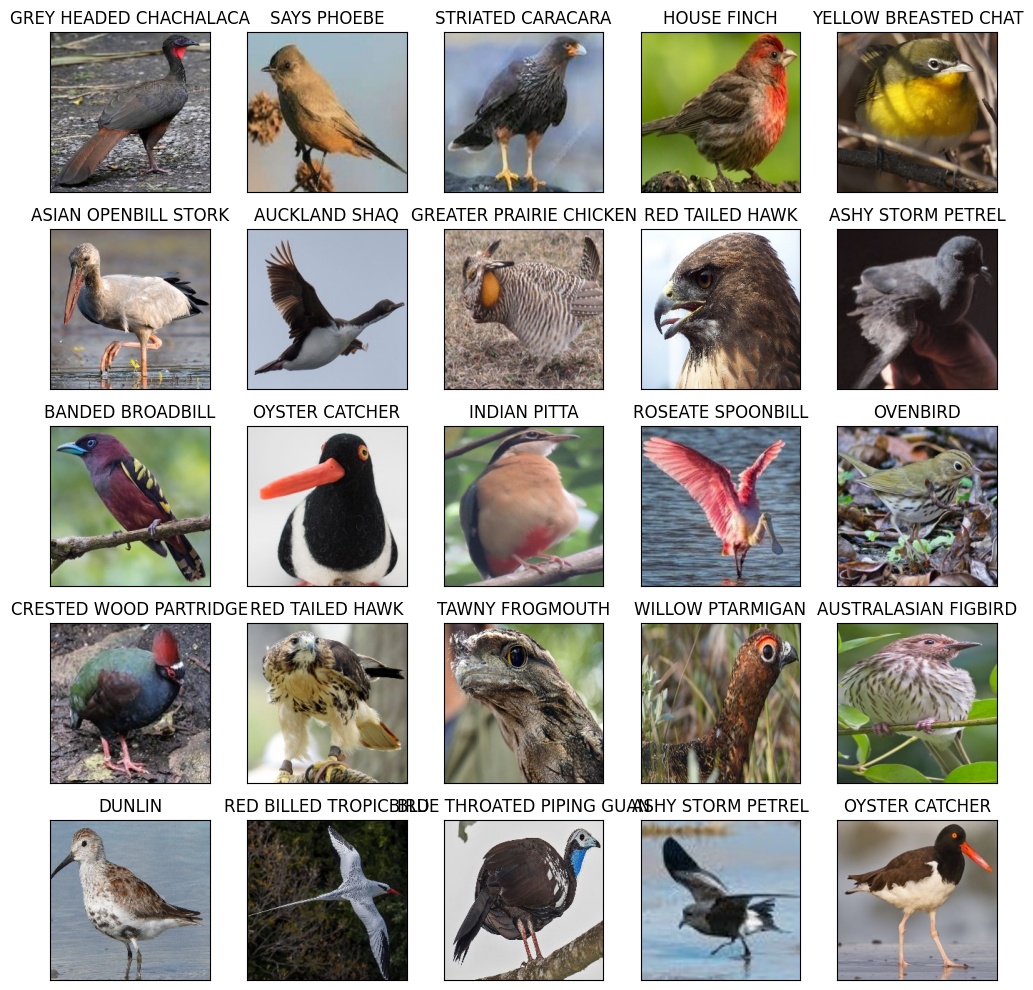

In [164]:
x_batch, y_batch = train_generator.next()

# Define the dimensions of the grid
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols

# Set up the matplotlib figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
axes = axes.flatten()

for i in range(num_images):
    # Plot image
    img = x_batch[i]
    ax = axes[i]
    ax.imshow(img)

    # Add human-readable label as the title
    label = index_to_class[y_batch[i]]
    ax.set_title(label)

    # Hide the axes ticks
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()


Findings from above: The data generator provided more data for us by performing various transformations on the images.

# Import helper functions

In [29]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import series of helper functions for our notebook
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir, pred_and_plot

--2024-04-10 22:32:26--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.003s  

2024-04-10 22:32:27 (3.26 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [27]:
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint, ReduceLROnPlateau
# Create checkpoint callback
checkpoint_path = "birds_classification_model_checkpoint"
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      save_weights_only=True,
                                      monitor="val_accuracy",
                                      save_best_only=True)




# Transfer Learning With EfficientNet
 I chose EfficientNetB0 because it's more lightweight and faster than subsequent versions while still incorporating the advanced architecture principles that make the EfficientNet family powerful.

### Importing the pre-trained model

In [18]:

from tensorflow.keras.applications import EfficientNetB0


pretrained_model = EfficientNetB0(weights='imagenet',
                  pooling='max',
                   include_top=False, #this is too specific, this will hurt performance on my dataset
                   input_shape=(height,width,channels))


16705208/16705208 [==============================] - 1s 0us/step


### Freezing Weights
This is a massive network with many layers and over 64 million trainable weights. However, since we are applying transfer learning, we will make all of these weights non-trainable and only train the new layers we add.


In [19]:
# Freeze all the layers in the base model
for layer in pretrained_model.layers:
    layer.trainable = False #freeze all the layers of the model -> during backprop the W's will not be updated

## Adding custom layers to the model

In [22]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dropout(0.45)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.45)(x)

outputs = Dense(525, activation='softmax')(x)

eff_model = Model(inputs=inputs, outputs=outputs)

eff_model.compile(
    optimizer=Adam(0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [24]:

from tensorflow.keras.layers import GlobalAveragePooling2D, Reshape, Dropout, Dense, Flatten
preprocess_input = tf.keras.applications.efficientnet_v2.preprocess_input

eff_model = Sequential([
    tf.keras.layers.Lambda(preprocess_input),  #  preprocess inputs for EfficientNetB0
    pretrained_model,  # Add the pretrained model
    Dense(256, activation='relu'),  # Add  custom dense layers
    Dropout(0.45),
    Dense(512, activation='relu'),
    Dropout(0.45),
    Dense(75, activation='softmax')
])


pretrained_model.trainable = False

Fully connected layers enable the model to take the features produced by the convolutional and pooling layers and perform classification of the images using the training dataset.

## Compile and Train the Custom EfficientNet Model

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

# I will compile my model with 'sparse_categorical_crossentropy' because I set class_mode='sparse' in my train_generator
eff_model.compile(optimizer=Adam(0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stop = EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 5,
                               restore_best_weights = True) # if val loss decreases for 3 epochs in a row, stop training

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)


In [30]:

# Fit the model
history = eff_model.fit(
    train_generator,
    steps_per_epoch=469,
    validation_steps=12,
    epochs=85,
    validation_data=valid_generator,
    callbacks=[early_stop,
              create_tensorboard_callback("training_logs", "bird_classification"),
              checkpoint_callback,
              reduce_lr
        ]
)


Saving TensorBoard log files to: training_logs/bird_classification/20240410-223234
Epoch 1/85
469/469 [==============================] - 308s 640ms/step - loss: 4.2991 - accuracy: 0.0871 - val_loss: 2.6157 - val_accuracy: 0.5067 - lr: 1.0000e-04
Epoch 2/85
469/469 [==============================] - 317s 675ms/step - loss: 2.5532 - accuracy: 0.3605 - val_loss: 0.9630 - val_accuracy: 0.8187 - lr: 1.0000e-04
Epoch 3/85
452/469 [===========================>..] - ETA: 11s - loss: 1.6319 - accuracy: 0.5621

KeyboardInterrupt: 

Findings from above:
A training accuracy of 97% suggests that the model correctly predicted labels for 97% of the training data.

#Evaluate Custom EfficientNet Model

For our final evaluation, we will explore the performance of the model on the test set. To do this, we need to use the evaluate and the predict method on the model. However, there is one important step to carry out first: these methods need, as input, a flow of images generated by a data generator just like we did for the training steps. To accomplish this, we will create another ImageDataGenerator for our test data.

In [40]:
# Apply the same preprocessing as our other generators
test_datagen = ImageDataGenerator(
                                   preprocessing_function=tf.keras.applications.efficientnet.preprocess_input)
test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/capstone_project/Sprint_4/test-75',
                                                  target_size=(height,width),
                                                  color_mode='rgb',
                                                  batch_size=32,
                                                  class_mode='sparse',
                                                  shuffle=False)


X_test, y_test = test_generator.next()


Found 375 images belonging to 75 classes.


In [54]:
# Evaluate the model's performance on the test data
score = eff_model.evaluate(X_test, y_test, verbose=1)

#change percentage on this so i see granular

print('Test loss:', score[0])

# Print test accuracy with 4 decimal places
print('Test accuracy: {:.4f}'.format(score[1]))

1/1 [==============================] - 2s 2s/step - loss: 0.0265 - accuracy: 1.0000
Test loss: 0.026464110240340233
Test accuracy: 1.0000


Findings from above:

 The test accuracy of 100% indicates the model accurately predicted all labels in unseen data. These scores suggest the model learned well from training data and generalizes effectively to new data. It shows high performance and minimal overfitting. The model's strong performance on both training and test data underscores the power of leveraging transfer learning with a pre-trained model like EfficientNet.








### Save model

In [223]:
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

!pip install pyyaml h5py

eff_model.save('hi-acc.h5')
from google.colab import files
files.download('hi-acc.h5')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Confusion Matrix
Showing a confusion matrix to visualize incorrectly predicted images.

In [51]:
y_test = y_test.astype(int)
X_test

array([[[[222., 222., 220.],
         [223., 223., 221.],
         [223., 223., 221.],
         ...,
         [229., 229., 227.],
         [229., 229., 227.],
         [229., 229., 227.]],

        [[223., 223., 221.],
         [223., 223., 221.],
         [223., 223., 221.],
         ...,
         [229., 229., 227.],
         [229., 229., 227.],
         [229., 229., 227.]],

        [[223., 223., 221.],
         [223., 223., 221.],
         [223., 223., 221.],
         ...,
         [229., 229., 227.],
         [229., 229., 227.],
         [229., 229., 227.]],

        ...,

        [[210., 208., 209.],
         [210., 208., 209.],
         [209., 207., 208.],
         ...,
         [225., 223., 226.],
         [225., 223., 226.],
         [224., 222., 225.]],

        [[207., 207., 207.],
         [207., 207., 207.],
         [209., 208., 206.],
         ...,
         [225., 223., 226.],
         [225., 223., 226.],
         [224., 222., 225.]],

        [[208., 208., 208.],
       

In [53]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('hi-acc.h5')


# Make predictions on the test data
predictions = model.predict(X_test)

# Convert predictions to class indices
predicted_classes = np.argmax(predictions, axis=1)

# Identify the indices of incorrect predictions
incorrect_indices = np.where(predicted_classes != y_test)[0]

# Subset the true and predicted labels to include only the incorrect predictions
incorrect_true = y_test[incorrect_indices]
incorrect_pred = predicted_classes[incorrect_indices]

# Compute the confusion matrix for the incorrect predictions
cm_incorrect = confusion_matrix(incorrect_true, incorrect_pred)

print("Confusion Matrix for Incorrect Predictions:")
print(cm_incorrect)

1/1 [==============================] - 2s 2s/step
Confusion Matrix for Incorrect Predictions:
[]


Findings from abve: The confusion matrix is empty, meaning the model classified all test images correctly. This aligns with the test accuracy of 100%.

## Classification report
To better understand the model's performance, let's look at a classification report. The integers on the left map to the class indices of the species.

## Saliency map for top 10 misclassified images
A saliency map shows the features which were the most important for the model's decision-making.

In [60]:
# First we rerun test generator without the efficientnet preprocessing function for better interpretability
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/capstone_project/Sprint_4/test-75',
                                                  target_size=(height,width),
                                                  color_mode='rgb',
                                                  batch_size=32,
                                                  class_mode='sparse',
                                                  shuffle=False)


X_test, y_test = test_generator.next()


Found 375 images belonging to 75 classes.


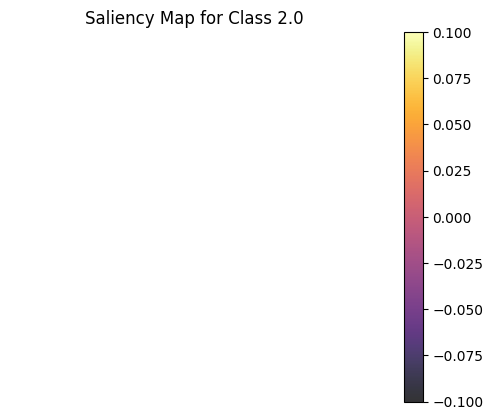

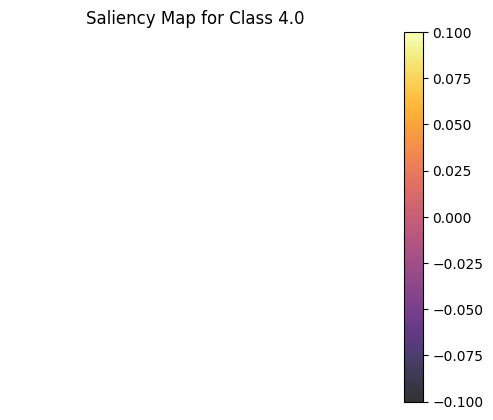

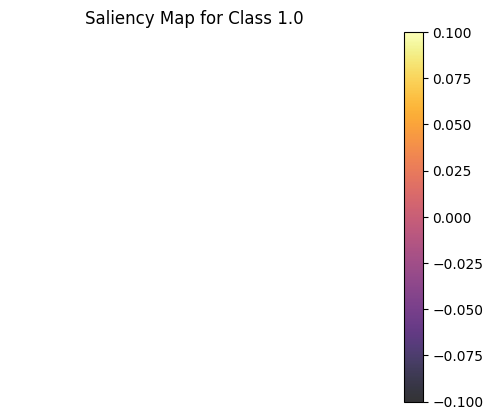

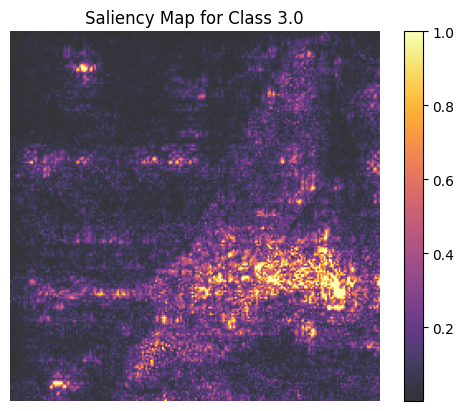

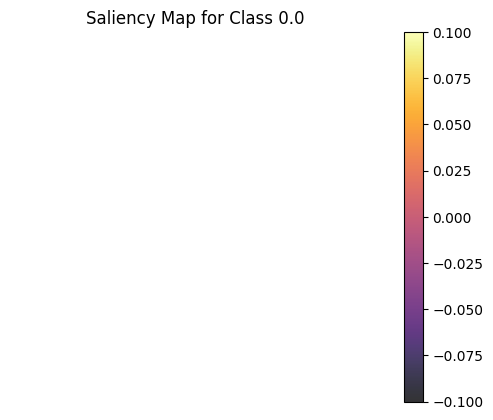

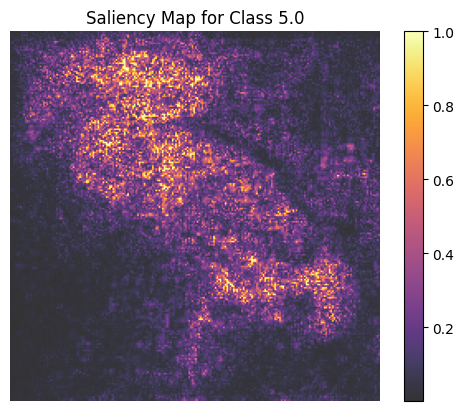

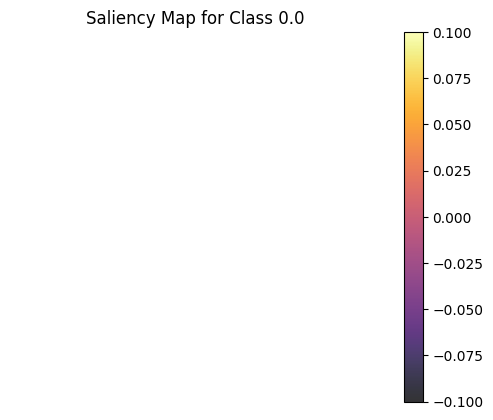

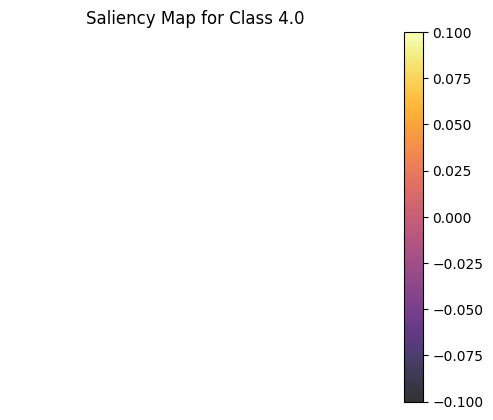

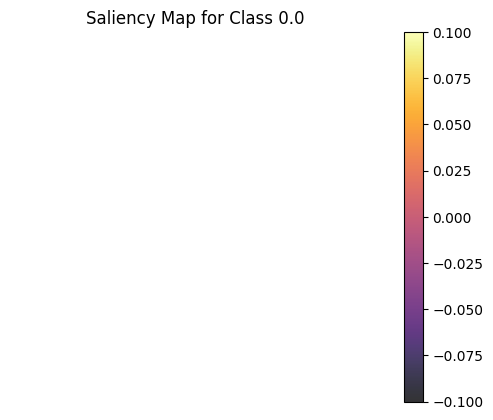

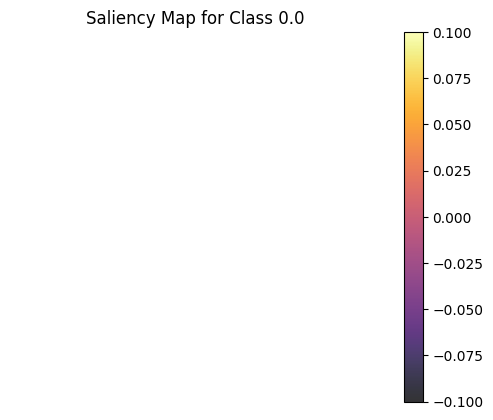

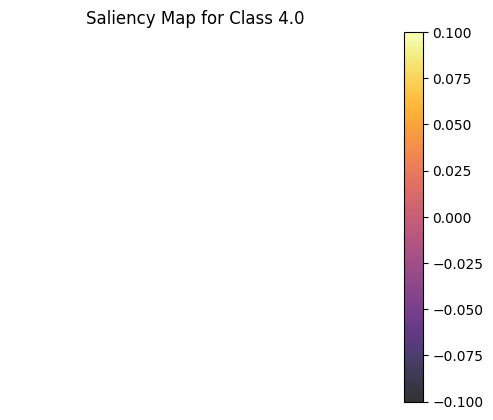

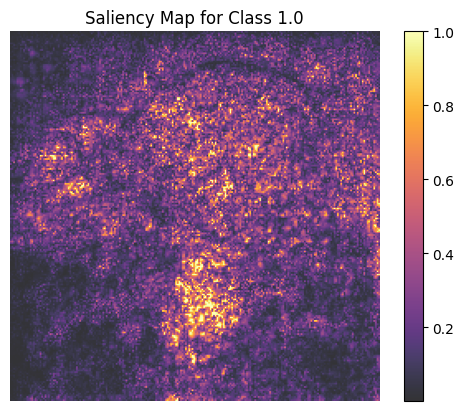

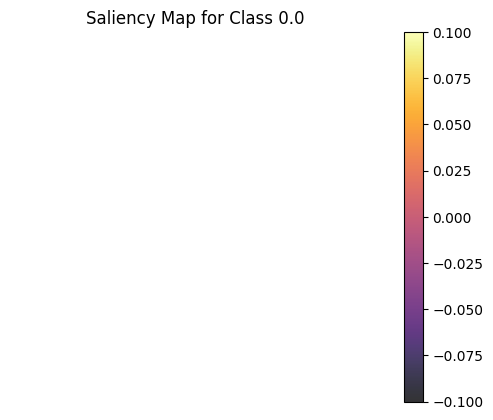

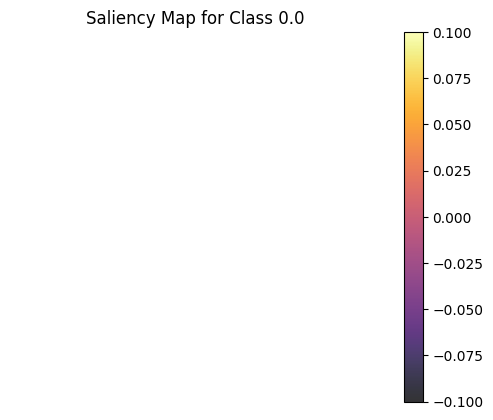

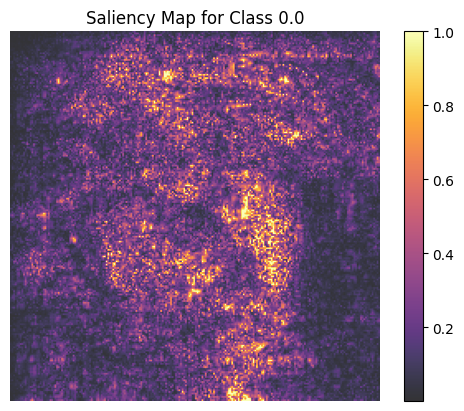

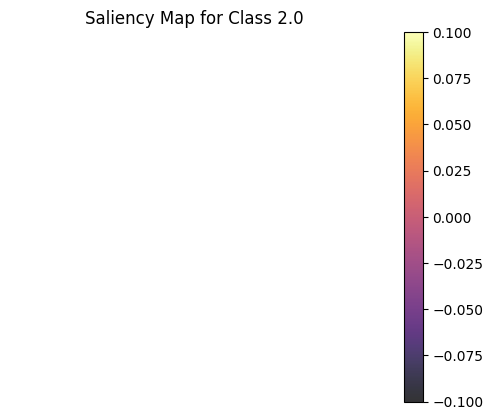

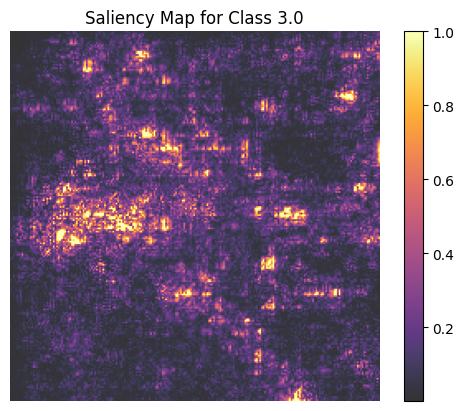

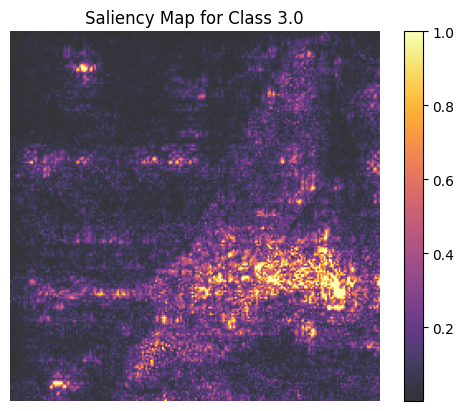

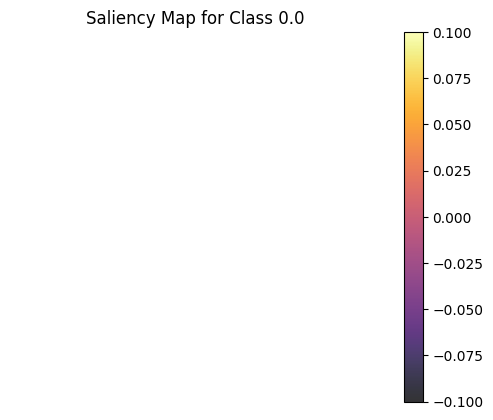

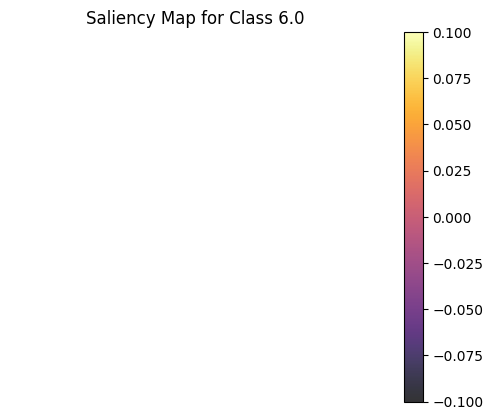

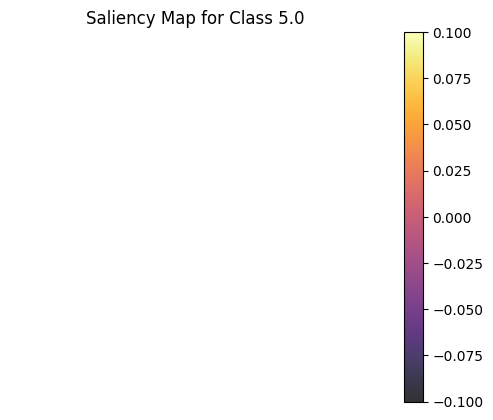

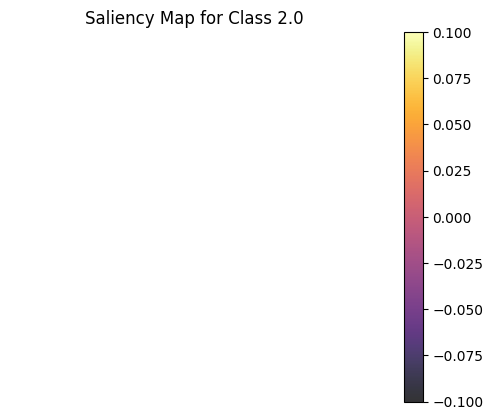

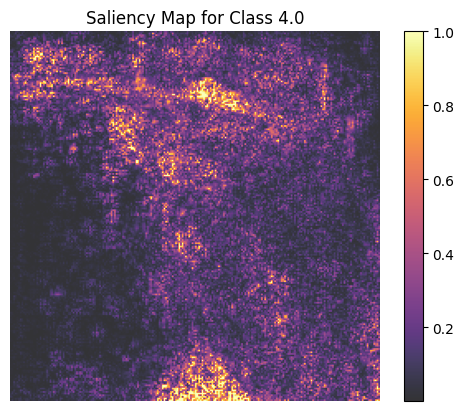

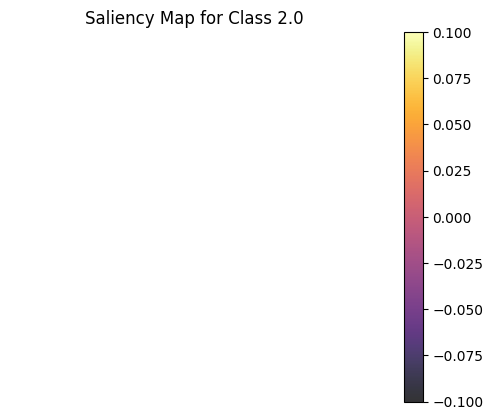

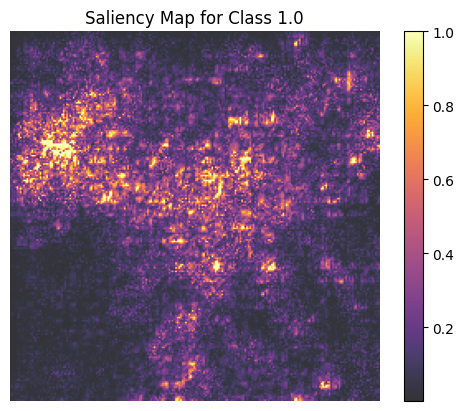

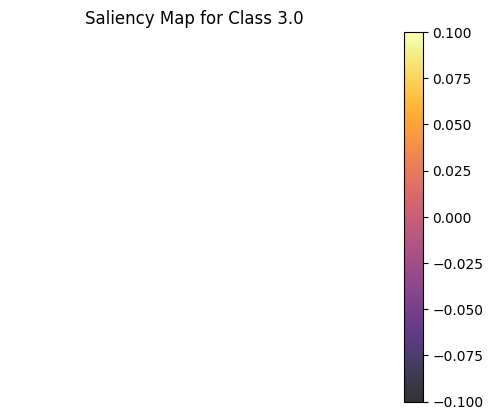

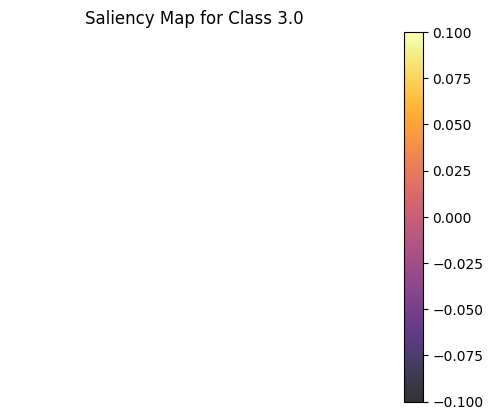

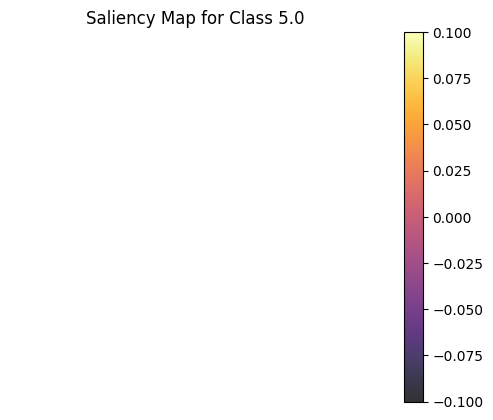

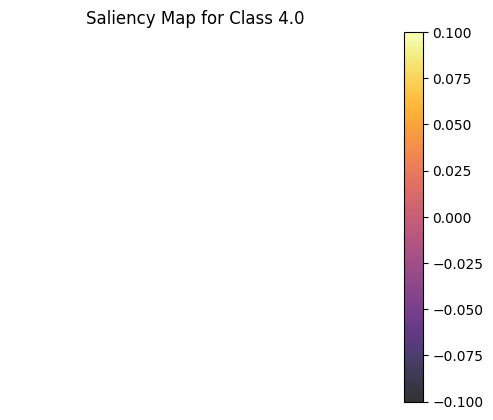

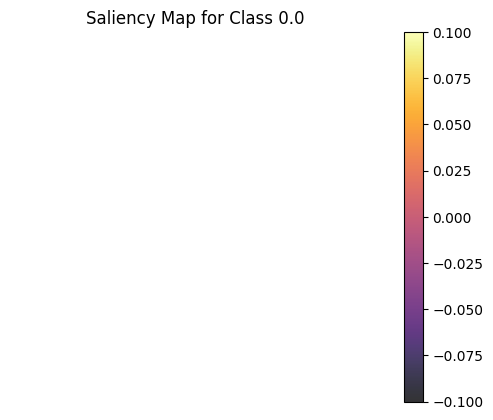

In [69]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image

def normalize_saliency_map(saliency_map, percentile=99):
    # Normalize based on a high percentile to reduce the impact of outliers
    vmax = np.percentile(saliency_map, percentile)
    normalized_saliency_map = np.clip(saliency_map / vmax, 0, 1)
    return normalized_saliency_map

def generate_saliency_map(model, img_array):
    # Create a TensorFlow variable to hold the input image
    input_image = tf.Variable(img_array, dtype=tf.float32)

    with tf.GradientTape() as tape:
        # Watch the input variable
        tape.watch(input_image)
        # Forward pass
        predictions = model(input_image)

    # Get the gradient of the predicted class with respect to the input image
    gradient = tape.gradient(predictions, input_image)
    # Compute the absolute values of the gradients
    gradient_abs = tf.abs(gradient)
    # Get the maximum gradient value across all channels
    max_grad_value = tf.reduce_max(gradient_abs, axis=-1)

    # Convert the tensor to a numpy array
    saliency_map = max_grad_value.numpy()[0]

    # Normalize the saliency map
    saliency_map = normalize_saliency_map(saliency_map)

    return saliency_map

# Assuming y_test and X_test are defined
# Get unique classes from y_test
unique_classes = np.unique(y_test)

# Randomly select 10 unique classes
selected_classes = np.random.choice(unique_classes, 30)

# For each selected class, choose a random image from the test set
for class_idx in selected_classes:
    # Find indices of images belonging to the current class
    class_indices = np.where(y_test == class_idx)[0]

    # Randomly choose one image index from this class
    chosen_index = np.random.choice(class_indices)

    # Load and preprocess the chosen image
    img = X_test[chosen_index]
    img_array = np.expand_dims(img, axis=0)

    # Generate the saliency map
    saliency_map = generate_saliency_map(model, img_array)

    # Plot the saliency map
    plt.figure()
    # Experiment with different colormaps and alpha values to find the best visibility
    plt.imshow(saliency_map, cmap='inferno', alpha=0.8)  # Try 'hot', 'viridis', 'plasma', etc.
    plt.colorbar()
    plt.axis('off')
    plt.title(f'Saliency Map for Class {class_idx}')
    plt.show()


Findings from above: Saliency maps highlight areas of the image that the model focuses on when making predictions. Brighter areas in the map indicate parts of the image that had a greater impact on the model's output. These maps show that the bird's beak, plumage and body shape are most important to the model's decision-making process, but sometimes it also takes the background into consideration.

#Conclusion

The transfer learning model's accuracy was 100% and the training accuracy was 97%, which may indicate that the test set was simple for the model to classify. It could also indicate that the pretrained EfficientNet model was very effective at my classification task.

#Next Steps

I would like to compare model accuracy when trained on grayscale images or background-removed images.